## Solutions

### Exercise 1

Here’s code to produce the 45 degree diagram

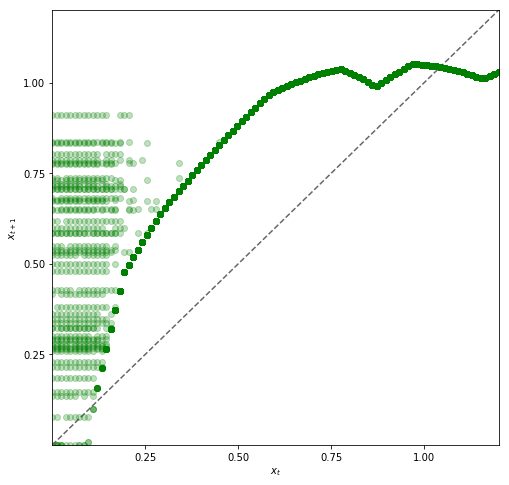

In [7]:
jv = JVWorker(grid_size=25, mc_size=50)
π, g, f_rvs, x_grid = jv.π, jv.g, jv.f_rvs, jv.x_grid
T, get_greedy = operator_factory(jv)
v_star = solve_model(jv, verbose=False)
s_policy, ϕ_policy = get_greedy(v_star)

# Turn the policy function arrays into actual functions
s = lambda y: interp(x_grid, s_policy, y)
ϕ = lambda y: interp(x_grid, ϕ_policy, y)

def h(x, b, u):
    return (1 - b) * g(x, ϕ(x)) + b * max(g(x, ϕ(x)), u)


plot_grid_max, plot_grid_size = 1.2, 100
plot_grid = np.linspace(0, plot_grid_max, plot_grid_size)
fig, ax = plt.subplots(figsize=(8, 8))
ticks = (0.25, 0.5, 0.75, 1.0)
ax.set(xticks=ticks, yticks=ticks,
       xlim=(0, plot_grid_max),
       ylim=(0, plot_grid_max),
       xlabel='$x_t$', ylabel='$x_{t+1}$')

ax.plot(plot_grid, plot_grid, 'k--', alpha=0.6)  # 45 degree line
for x in plot_grid:
    for i in range(jv.mc_size):
        b = 1 if np.random.uniform(0, 1) < π(s(x)) else 0
        u = f_rvs[i]
        y = h(x, b, u)
        ax.plot(x, y, 'go', alpha=0.25)

plt.show()

Looking at the dynamics, we can see that

- If $ x_t $ is below about 0.2 the dynamics are random, but
  $ x_{t+1} > x_t $ is very likely  
- As $ x_t $ increases the dynamics become deterministic, and
  $ x_t $ converges to a steady state value close to 1  


Referring back to the figure [here](#jv-policies) we see that $ x_t \approx 1 $ means that
$ s_t = s(x_t) \approx 0 $ and
$ \phi_t = \phi(x_t) \approx 0.6 $

### Exercise 2

The figure can be produced as follows

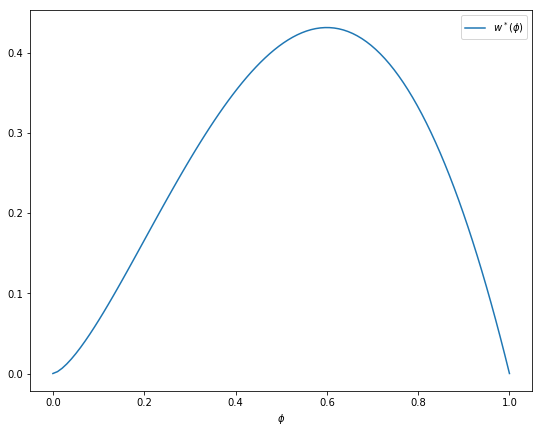

In [8]:
jv = JVWorker()

def xbar(ϕ):
    A, α = jv.A, jv.α
    return (A * ϕ**α)**(1 / (1 - α))

ϕ_grid = np.linspace(0, 1, 100)
fig, ax = plt.subplots(figsize=(9, 7))
ax.set(xlabel='$\phi$')
ax.plot(ϕ_grid, [xbar(ϕ) * (1 - ϕ) for ϕ in ϕ_grid], label='$w^*(\phi)$')
ax.legend()

plt.show()

Observe that the maximizer is around 0.6

This this is similar to the long run value for $ \phi $ obtained in
exercise 1

Hence the behaviour of the infinitely patent worker is similar to that
of the worker with $ \beta = 0.96 $

This seems reasonable, and helps us confirm that our dynamic programming
solutions are probably correct